In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
data.shape

(246, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
data.loc[:122,"region"]=0
data.loc[122:,"region"]=1
df = data

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [9]:
df[["region"]]=df[["region"]].astype(int)

In [10]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
region         0
dtype: int64

In [11]:
df = df.dropna().reset_index(drop=True)

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [13]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [14]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [15]:
df = df.drop(122).reset_index(drop=True)

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [18]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [19]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [21]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [23]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [24]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [25]:
df['Classes'] = df['Classes'].str.strip()

In [26]:
df.to_csv("algeria_cleaned_dataset.csv",index=False)

## EDA

In [27]:
df2 = df.drop(["day","month","year"],axis=1)

In [28]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
df2["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df2["Classes"]=label.fit_transform(df2["Classes"])

In [31]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [32]:
df2["Classes"]=df2["Classes"].astype(int)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


<Axes: ylabel='Count'>

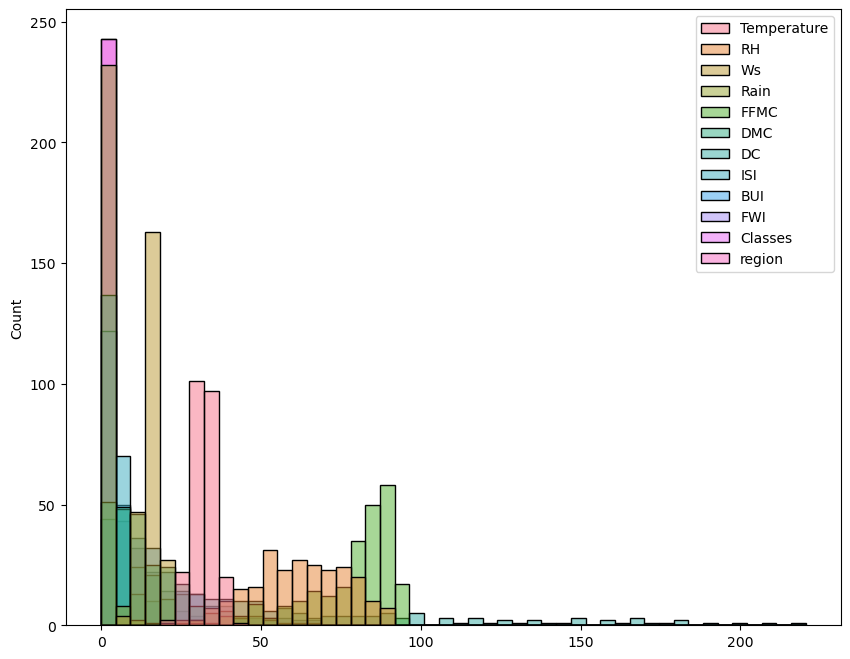

In [34]:
plt.figure(figsize=(10,8))
sns.histplot(df2)

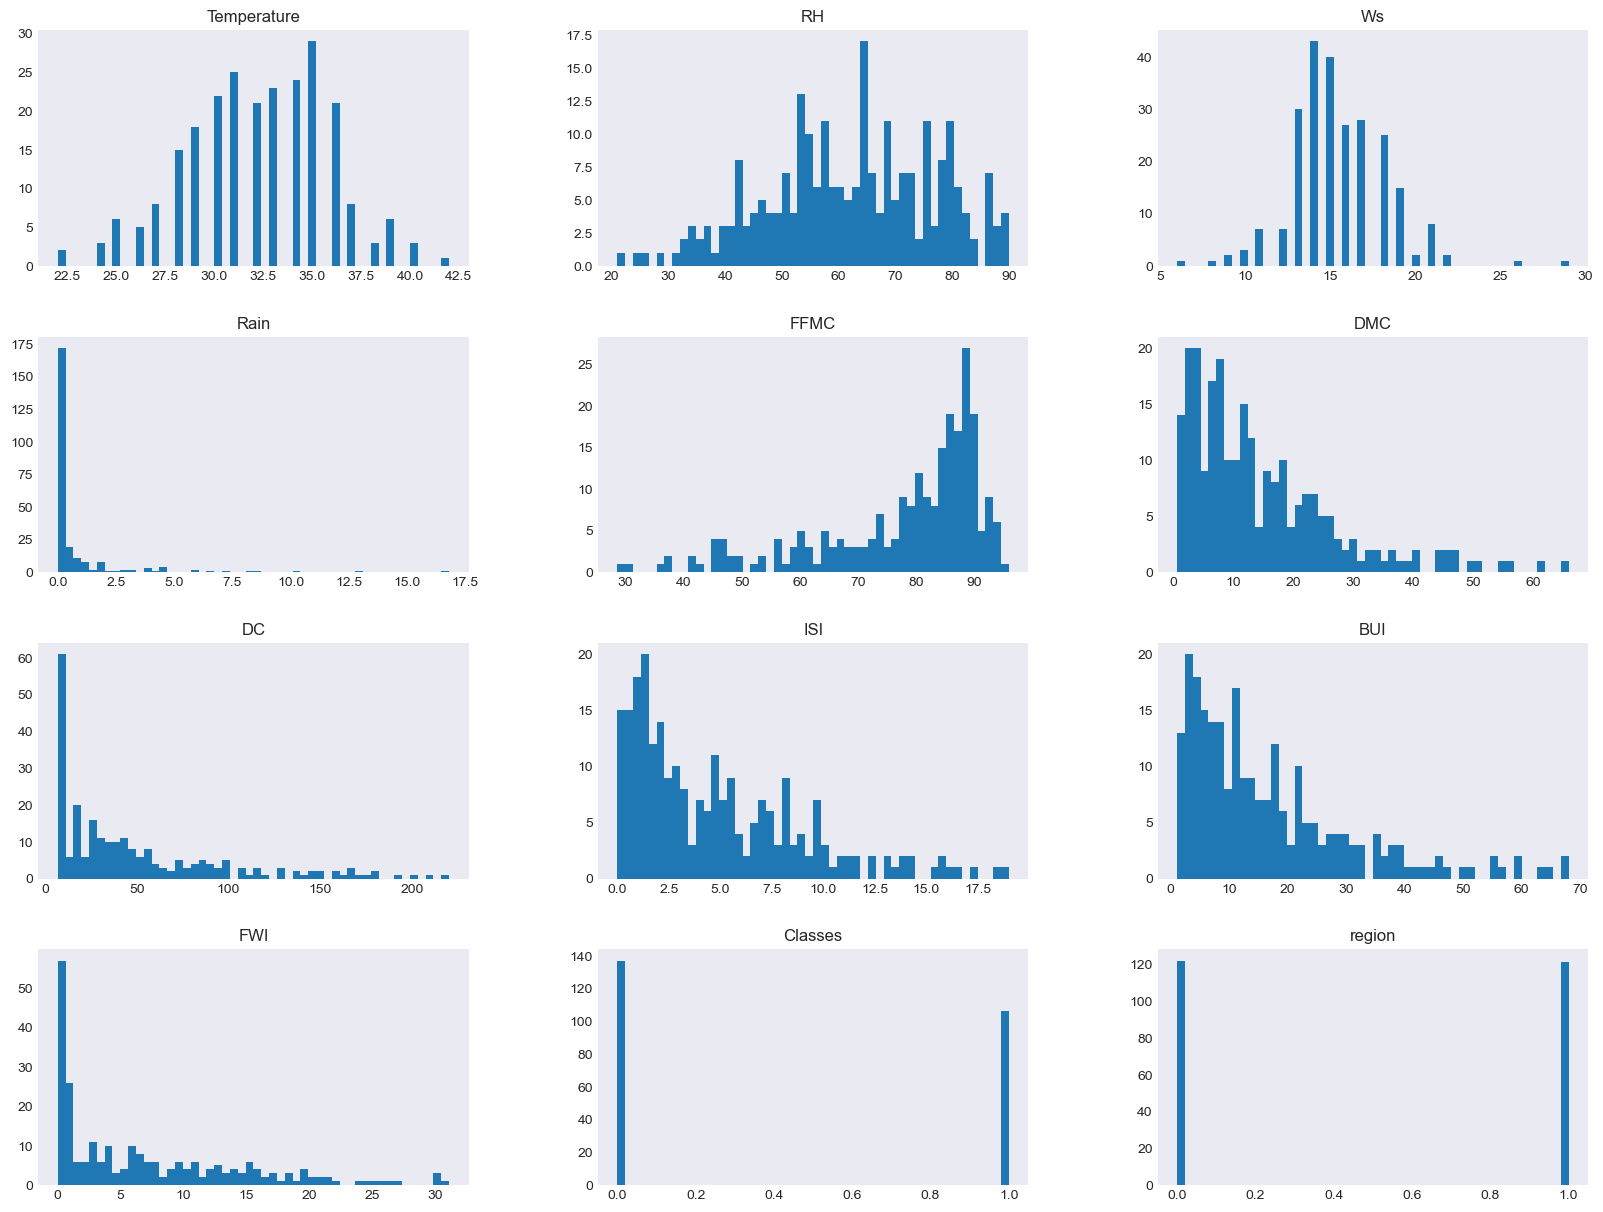

In [35]:
plt.style.use('seaborn-v0_8-darkgrid')
df2.hist(bins=50, figsize=(20, 15), grid=False)
plt.show()

In [36]:
percent  = df2["Classes"].value_counts(normalize=True)*100

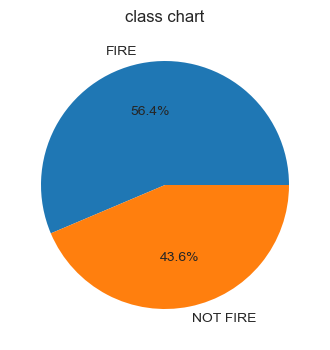

In [37]:
classlabels = ["FIRE","NOT FIRE"]
plt.figure(figsize=(4,6))
plt.pie(percent,labels=classlabels,autopct="%1.1f%%")
plt.title("class chart")
plt.show()

<Axes: >

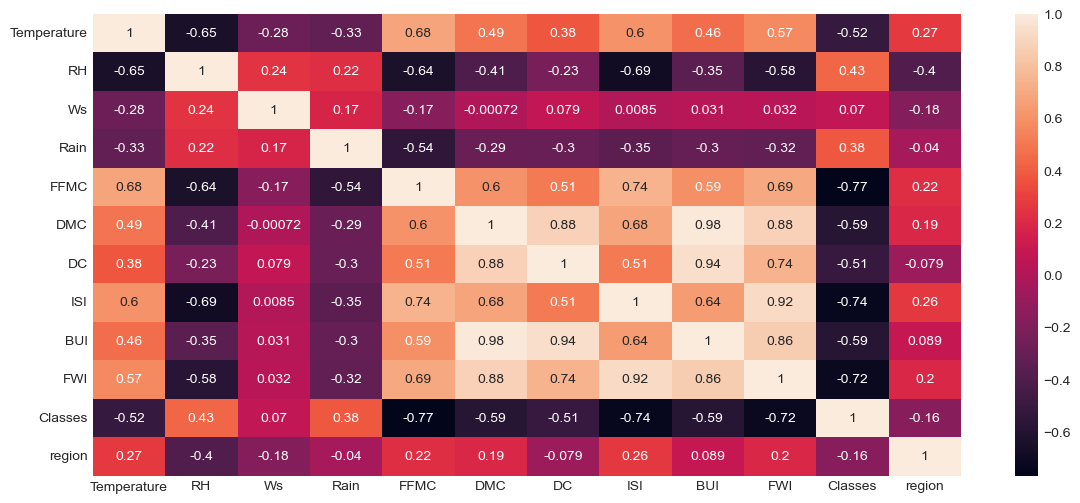

In [38]:
plt.figure(figsize=(14,6))
sns.heatmap(df2.corr(),annot=True)

In [39]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Text(0.5, 1.0, 'fires')

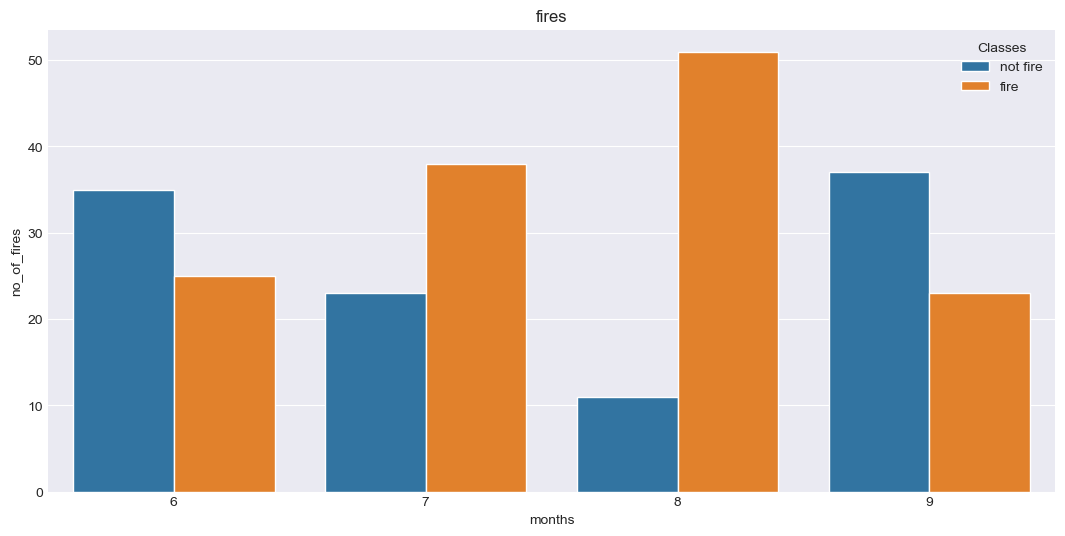

In [40]:
dftemp = df.loc[df["region"]]==0
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data = df)
plt.xlabel("months")
plt.ylabel("no_of_fires")
plt.title("fires")

Text(0.5, 1.0, 'fires')

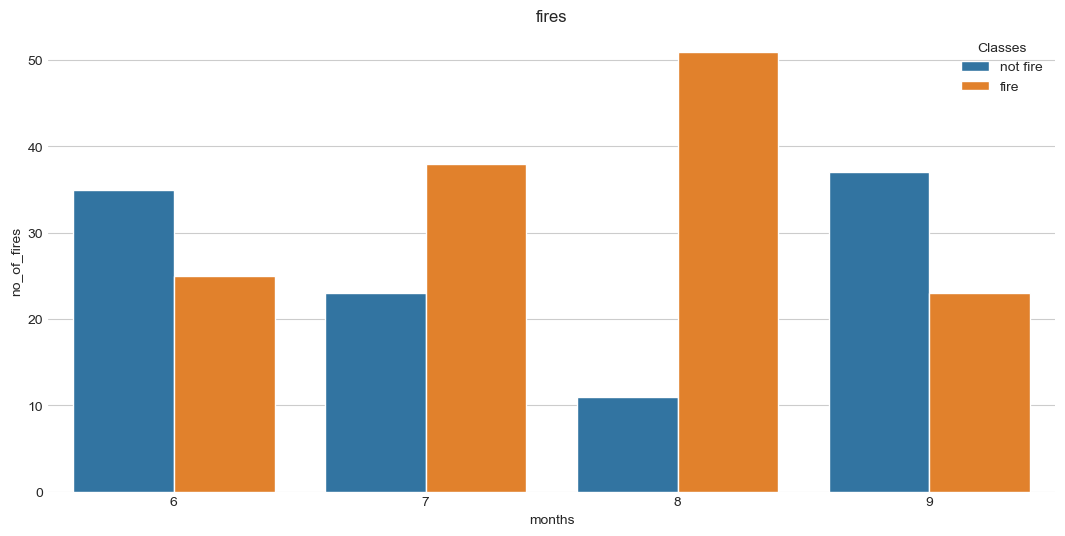

In [41]:
dftemp = df.loc[df["region"]]==1
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data = df)
plt.xlabel("months")
plt.ylabel("no_of_fires")
plt.title("fires")

In [42]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [48]:
x=df2.drop("FWI",axis=1)
y = df["FWI"]

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 40)

In [50]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

<Axes: >

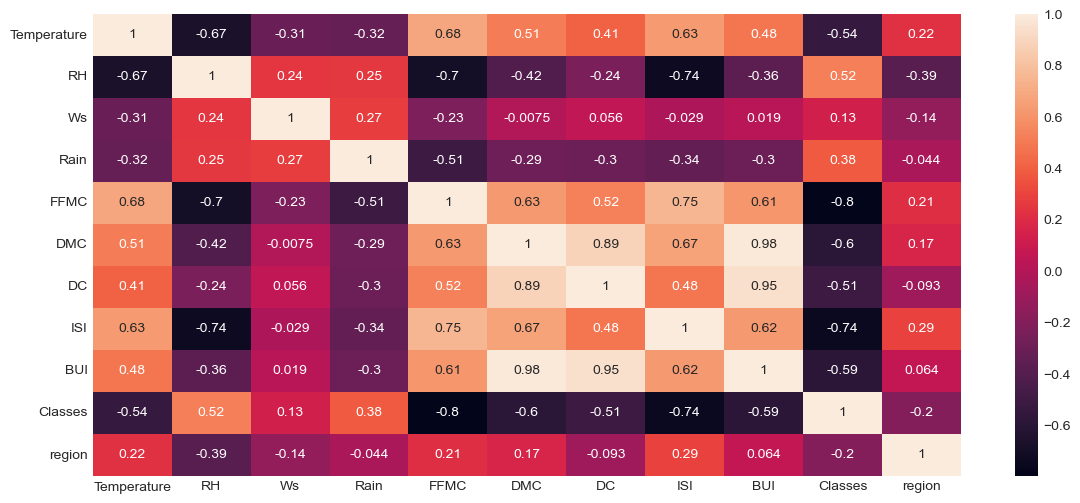

In [51]:
plt.figure(figsize=(14,6))
sns.heatmap(x_train.corr(),annot=True)

In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_sc = ss.fit_transform(x_train)
x_test_sc = ss.transform(x_test)


Text(0.5, 1.0, 'After Scaling')

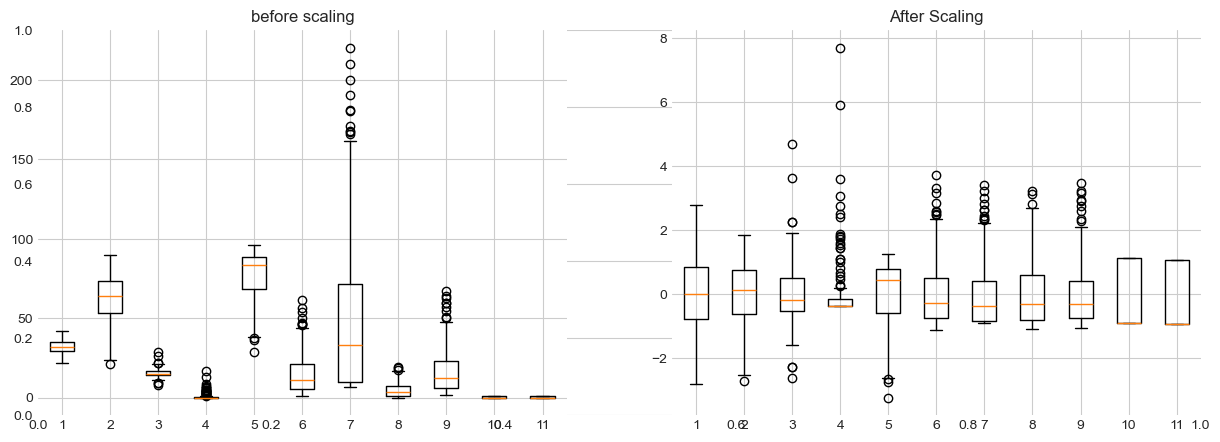

In [56]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(x_train)
plt.title("before scaling")
plt.subplot(1,2,2)
plt.boxplot(x_train_sc)
plt.title("After Scaling")

# LinearRegression

0.9883474589789911


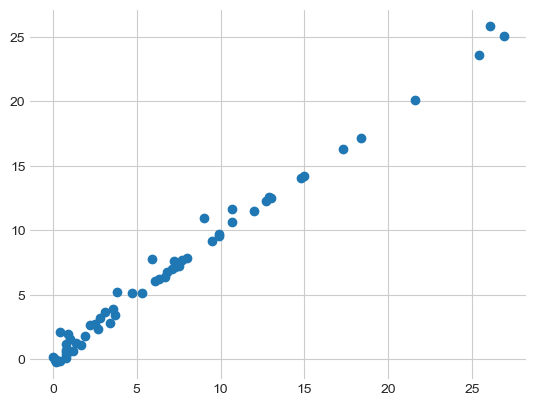

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("r2_score:",r2_score(y_test,y_pred))
print("mse:",mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred)


## After Scaling

0.9883474589789912
mse: 0.5386411356564339


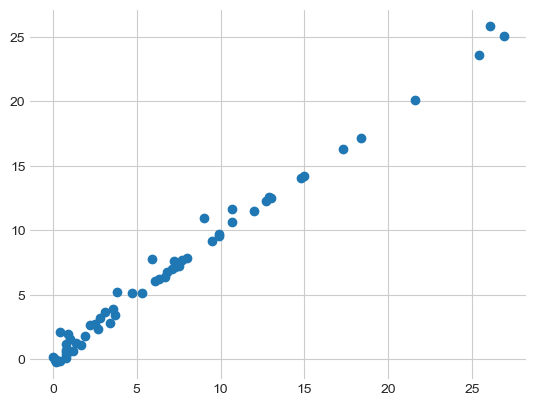

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr = LinearRegression()
lr.fit(x_train_sc,y_train)
y_pred_sc = lr.predict(x_test_sc)
print(r2_score(y_test,y_pred_sc))
print("mse:",mean_squared_error(y_test,y_pred_sc))
plt.scatter(y_test,y_pred_sc)


# checking the model overfitting

0.972253340994129
mse: 1.6109434461045626


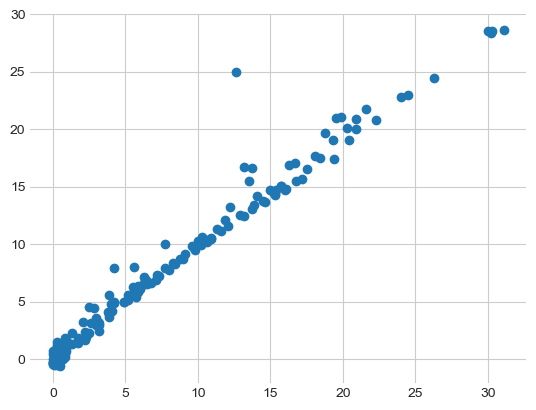

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train_sc,y_train)
y_pred_sc = lr.predict(x_train_sc)
print(r2_score(y_train,y_pred_sc))
print("mse:",mean_squared_error(y_train,y_pred_sc))
plt.scatter(y_train,y_pred_sc)

# Cross val with lasso

r2_score: 0.9862159850379728
mse: 0.6371689625177457


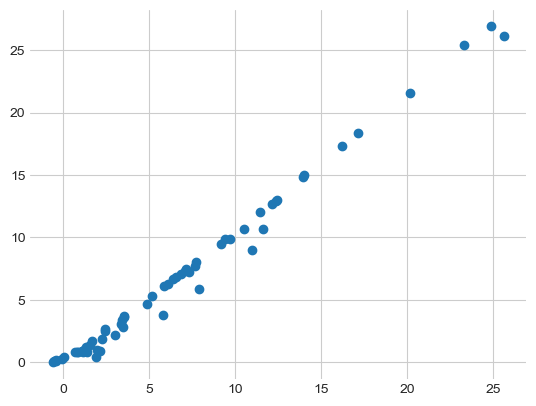

In [67]:
from sklearn.linear_model import LassoCV
lassocv =  LassoCV(cv=5)
lassocv.fit(x_train,y_train)
las_pred = lassocv.predict(x_test)
print("r2_score:",r2_score(y_test,las_pred))
print("mse:",mean_squared_error(y_test,las_pred))
plt.scatter(las_pred,y_test)

# by scaling

r2_score: 0.9878404196006187
mse: 0.5620791365265195


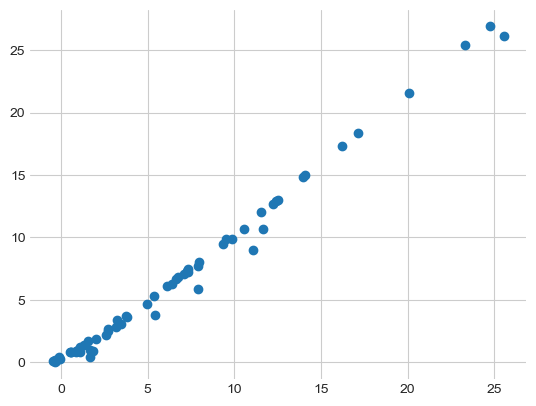

In [68]:
from sklearn.linear_model import LassoCV
lassocv =  LassoCV(cv=5)
lassocv.fit(x_train_sc,y_train)
las_pred_sc = lassocv.predict(x_test_sc)
print("r2_score:",r2_score(y_test,las_pred_sc))
print("mse:",mean_squared_error(y_test,las_pred_sc))
plt.scatter(las_pred_sc,y_test)

# Ridge

r2_score: 0.9883922945063436
MSE: 0.5365686040663468


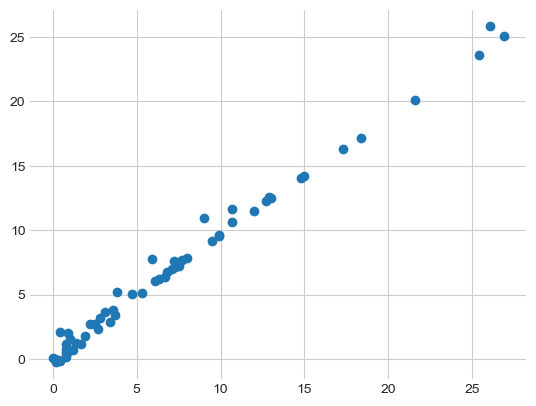

In [70]:
from sklearn.linear_model import Ridge
ri  = Ridge()
ri.fit(x_train,y_train)
y_prid_r = ri.predict(x_test)
print("r2_score:",r2_score(y_test,y_prid_r))
print("MSE:",mean_squared_error(y_test,y_prid_r))
plt.scatter(y_test,y_prid_r)

# scalling

r2_score: 0.987970941326139
MSE: 0.5560457425796239


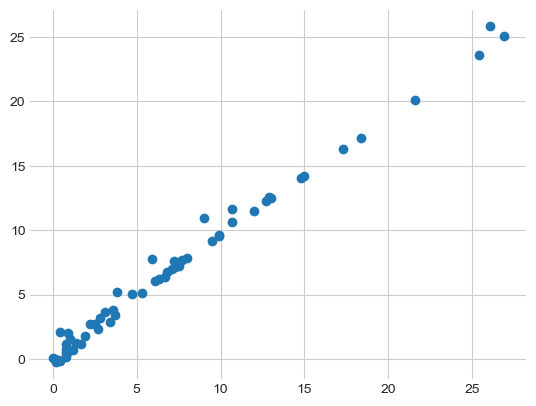

In [71]:
from sklearn.linear_model import Ridge
ri  = Ridge()
ri.fit(x_train_sc,y_train)
y_prid_r_sc = ri.predict(x_test_sc)
print("r2_score:",r2_score(y_test,y_prid_r_sc))
print("MSE:",mean_squared_error(y_test,y_prid_r_sc))
plt.scatter(y_test,y_prid_r)

# cross

r2_score: 0.9882341505427958
MSE: 0.5438788417191478


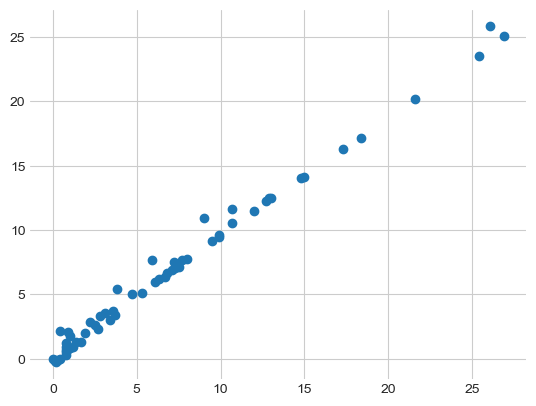

In [75]:
from sklearn.linear_model import RidgeCV
r_cv = RidgeCV(cv=5)
r_cv.fit(x_train,y_train)
y_prid_r_cv = r_cv.predict(x_test)
print("r2_score:",r2_score(y_test,y_prid_r_cv))
print("MSE:",mean_squared_error(y_test,y_prid_r_cv))
plt.scatter(y_test,y_prid_r_cv)

# Scaling

r2_score: 0.987970941326139
MSE: 0.5560457425796239


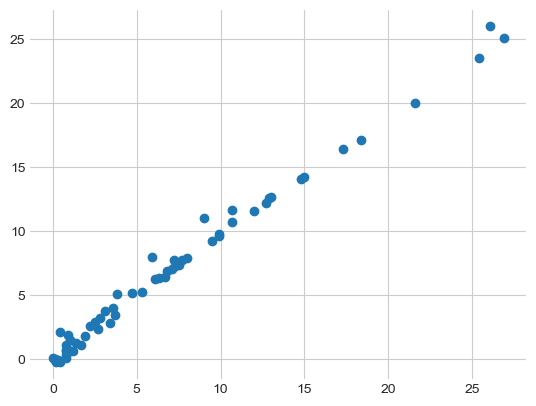

In [76]:
from sklearn.linear_model import RidgeCV
r_cv = RidgeCV(cv=5)
r_cv.fit(x_train_sc,y_train)
y_prid_r_cv_s = r_cv.predict(x_test_sc)
print("r2_score:",r2_score(y_test,y_prid_r_cv_s))
print("MSE:",mean_squared_error(y_test,y_prid_r_cv_s))
plt.scatter(y_test,y_prid_r_cv_s)

In [77]:
r_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

In [78]:
ss

StandardScaler()

In [79]:
lr

LinearRegression()

In [80]:
import pickle
pickle.dump(ss,open("ss.pkl","wb"))
pickle.dump(lr,open("lr.pkl","wb"))